In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from Task1 import final_data,X,y,x_train, x_test, y_train, y_test 

In [2]:
def plot_roc_curve(fpr_train, tpr_train,fpr_test,tpr_test, name=None):
    plt.plot(fpr_train, tpr_train, linewidth=2,c='r',label='train')
    plt.plot(fpr_test, tpr_test, linewidth=2,c='b',label='test')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(name)
    plt.legend(loc='best')
    plt.show()

## XGBoost

n_estimators参数调优

In [26]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
param_test = {'n_estimators':range(50,500,50)}
gsearch = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=6, 
                                                  min_child_weight=1, gamma=0, subsample=0.8, 
                                                  colsample_bytree=0.8, objective= 'binary:logistic', 
                                                  nthread=3,scale_pos_weight=1, seed=2018), 
                        param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch.fit(x_train, y_train)
# gsearch.grid_scores_, 
gsearch.best_params_, gsearch.best_score_

({'n_estimators': 100}, 0.9306266614406644)

在n_estimators_best = 100条件下 
min_child_weight，max_depth参数调优

In [27]:
param_test = {'max_depth':range(3,15,2), 'min_child_weight':range(1,12,2)}

gsearch = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=5, 
                                                  min_child_weight=1, gamma=0, subsample=0.8, 
                                                  colsample_bytree=0.8, objective= 'binary:logistic', 
                                                  nthread=3,scale_pos_weight=1, seed=2018), 
                        param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch.fit(x_train, y_train)
# gsearch.grid_scores_, 
gsearch.best_params_, gsearch.best_score_

({'max_depth': 13, 'min_child_weight': 1}, 0.9324064153648097)

gamma 参数调优

In [28]:
param_test = {'gamma':[i/10 for i in range(1,6)]}

gsearch = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=13, 
                                                  min_child_weight=3, gamma=0, subsample=0.8, 
                                                  colsample_bytree=0.8, objective= 'binary:logistic', 
                                                  nthread=3,scale_pos_weight=1, seed=2018), 
                        param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch.fit(x_train, y_train)
# gsearch.grid_scores_, 
gsearch.best_params_, gsearch.best_score_

({'gamma': 0.3}, 0.9314711563228112)

subsample 和 colsample_bytree 参数

In [36]:
param_test = {'subsample':[i/10 for i in range(5,10)], 'colsample_bytree':[i/10 for i in range(5,10)]}

gsearch = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=13, 
                                                  min_child_weight=3, gamma=0.1, subsample=0.8, 
                                                  colsample_bytree=0.8, objective= 'binary:logistic', 
                                                  nthread=4,scale_pos_weight=1, seed=2018), 
                        param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch.fit(x_train, y_train)
# gsearch.grid_scores_, 
gsearch.best_params_, gsearch.best_score_

({'colsample_bytree': 0.5, 'subsample': 0.8}, 0.9321499932561705)

In [ ]:
learning_rate 参数

In [30]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_test = {'learning_rate':[0.001, 0.01, 0.1]}

gsearch = GridSearchCV(estimator = XGBClassifier(learning_rate =0.1, n_estimators=100, max_depth=13, 
                                                  min_child_weight=3, gamma=0.1, subsample=0.8, 
                                                  colsample_bytree=0.5, objective= 'binary:logistic', 
                                                  nthread=4,scale_pos_weight=1, seed=2018), 
                        param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

gsearch.fit(x_train, y_train)
# gsearch.grid_scores_, 
gsearch.best_params_, gsearch.best_score_



({'learning_rate': 0.1}, 0.9230563063826132)

In [3]:
from xgboost import XGBClassifier 
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=100,
 max_depth=13,
 min_child_weight=1,
 gamma=0.1,#惩罚项
 subsample=0.8,#随机选80%的样本
 colsample_bytree=0.5,#随机选特征
 objective= 'binary:logistic',#lost funation ： logistic
 nthread=3,#3线程
 scale_pos_weight=1,
 seed=2018)

In [4]:
xgb = xgb1.fit(x_train,y_train)
xgb.score(x_test,y_test)

0.8703790360318203

准确率:0.8704,精确率:0.9076,召回率:0.8230,f1-score:0.8632,auc:0.8701


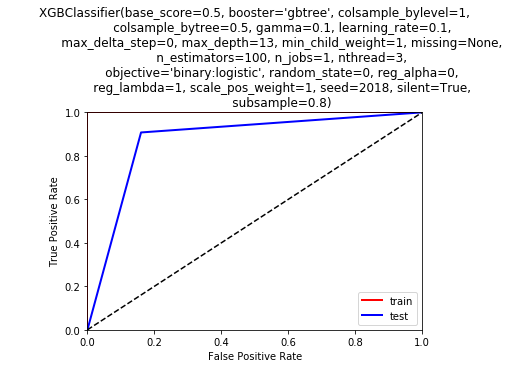

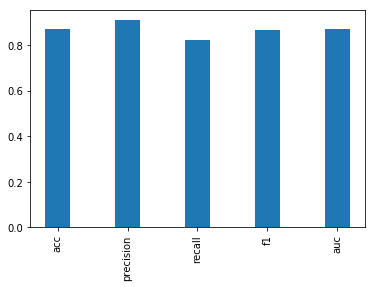

In [11]:
from sklearn import metrics
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score,roc_curve,roc_auc_score
y_train_pred = xgb.predict(x_train)
y_test_pred = xgb.predict(x_test)
acc = metrics.accuracy_score(y_test,y_test_pred)
precision = metrics.precision_score(y_test,y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
f1 = metrics.f1_score(y_test,y_test_pred)
auc= metrics.roc_auc_score(y_test,y_test_pred)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc,precision,recall,f1,auc))


fpr_train, tpr_train, thresholds_train = roc_curve(y_train_pred,y_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_pred,y_test)
plot_roc_curve(fpr_train, tpr_train,fpr_test,tpr_test,xgb)

predictors = ['acc','precision','recall','f1','auc']
xgb_scores = [acc,precision,recall,f1,auc]
plt.bar(range(len(predictors)), xgb_scores, width = 0.35)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

## RandomForestClassifier



In [12]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=500, min_samples_split=4, min_samples_leaf=2,bootstrap=True, max_depth=4, max_features=6)
RF.fit(x_train, y_train)
RF.score(x_test, y_test)

0.785212915301825

准确率:0.7852,精确率:0.7913,召回率:0.7712,f1-score:0.7811,auc:0.7851


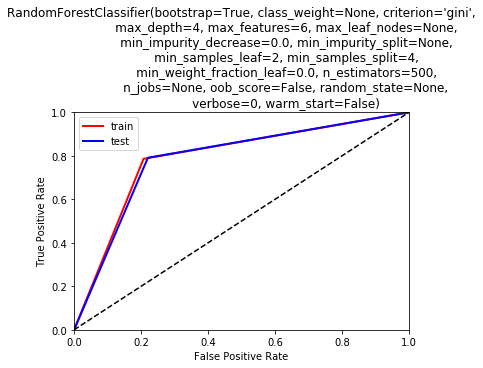

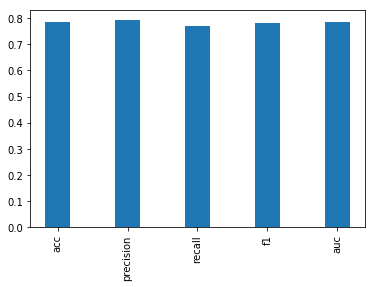

In [13]:
from sklearn import metrics
y_train_pred = RF.predict(x_train)
y_test_pred = RF.predict(x_test)
acc = metrics.accuracy_score(y_test,y_test_pred)
precision = metrics.precision_score(y_test,y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
f1 = metrics.f1_score(y_test,y_test_pred)
auc= metrics.roc_auc_score(y_test,y_test_pred)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc,precision,recall,f1,auc))

fpr_train, tpr_train, thresholds_train = roc_curve(y_train_pred,y_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_pred,y_test)
plot_roc_curve(fpr_train, tpr_train,fpr_test,tpr_test,RF)


RF_scores = [acc,precision,recall,f1,auc]
plt.bar(range(len(predictors)), RF_scores, width = 0.35)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

## LogisticRegression

In [14]:
from sklearn.linear_model import LogisticRegression as LR
lr = LR().fit(x_train,y_train)
lr.score(x_test,y_test)

C:\Users\SYX\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7262517547964437

准确率:0.7263,精确率:0.7540,召回率:0.6667,f1-score:0.7076,auc:0.7259


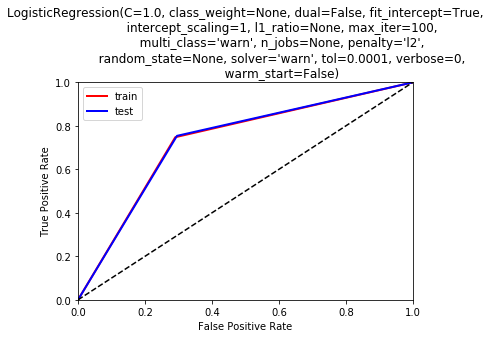

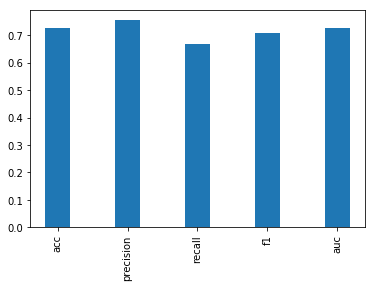

In [15]:
from sklearn import metrics

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
acc = metrics.accuracy_score(y_test,y_test_pred)
precision = metrics.precision_score(y_test,y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
f1 = metrics.f1_score(y_test,y_test_pred)
auc= metrics.roc_auc_score(y_test,y_test_pred)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc,precision,recall,f1,auc))

fpr_train, tpr_train, thresholds_train = roc_curve(y_train_pred,y_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_pred,y_test)
plot_roc_curve(fpr_train, tpr_train,fpr_test,tpr_test,lr)


lr_scores = [acc,precision,recall,f1,auc]
plt.bar(range(len(predictors)), lr_scores, width = 0.35)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

## SVM

In [16]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf',gamma='auto',cache_size=5000).fit(x_train,y_train)
svm.score(x_test,y_test)

0.7622835751052878

准确率:0.7623,精确率:0.7608,召回率:0.7608,f1-score:0.7608,auc:0.7623


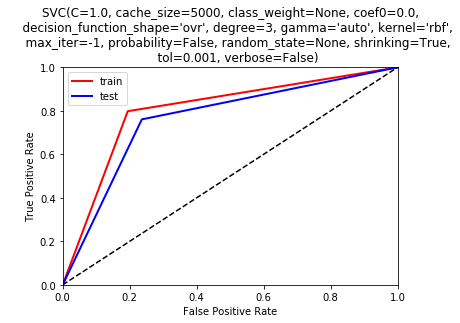

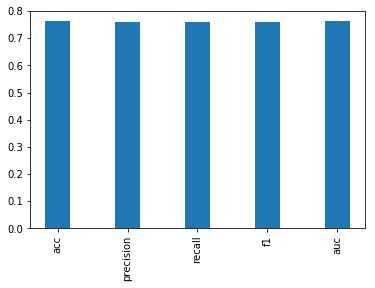

In [17]:
from sklearn import metrics
y_train_pred = svm.predict(x_train)
y_test_pred = svm.predict(x_test)
acc = metrics.accuracy_score(y_test,y_test_pred)
precision = metrics.precision_score(y_test,y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
f1 = metrics.f1_score(y_test,y_test_pred)
auc= metrics.roc_auc_score(y_test,y_test_pred)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc,precision,recall,f1,auc))

fpr_train, tpr_train, thresholds_train = roc_curve(y_train_pred,y_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_pred,y_test)
plot_roc_curve(fpr_train, tpr_train,fpr_test,tpr_test,svm)

svm_scores = [acc,precision,recall,f1,auc]
plt.bar(range(len(predictors)), svm_scores, width = 0.35)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

## DecisionTree

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(x_train,y_train)
dtc.score(x_test,y_test)

0.7660271408516612

准确率:0.7660,精确率:0.7527,召回率:0.7881,f1-score:0.7700,auc:0.7662


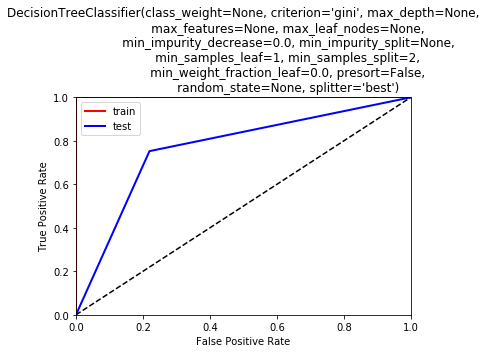

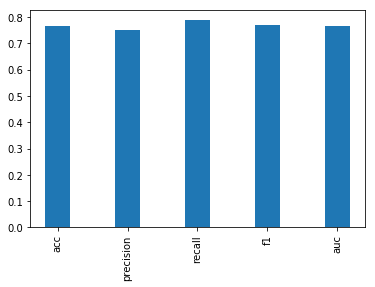

In [19]:
from sklearn import metrics

y_train_pred = dtc.predict(x_train)
y_test_pred = dtc.predict(x_test)
acc = metrics.accuracy_score(y_test,y_test_pred)
precision = metrics.precision_score(y_test,y_test_pred)
recall = metrics.recall_score(y_test,y_test_pred)
f1 = metrics.f1_score(y_test,y_test_pred)
auc= metrics.roc_auc_score(y_test,y_test_pred)
print('准确率:{:.4f},精确率:{:.4f},召回率:{:.4f},f1-score:{:.4f},auc:{:.4f}'.format(acc,precision,recall,f1,auc))

fpr_train, tpr_train, thresholds_train = roc_curve(y_train_pred,y_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test_pred,y_test)
plot_roc_curve(fpr_train, tpr_train,fpr_test,tpr_test,dtc)

dtc_scores = [acc,precision,recall,f1,auc]
plt.bar(range(len(predictors)), dtc_scores, width = 0.35)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

In [20]:
s = pd.DataFrame( columns=predictors, index=['xgb', 'rf', 'svm', 'lr', 'dtc'])

In [21]:
for i in range(5):
    s.iloc[0][i] = xgb_scores[i]
    s.iloc[1][i] = RF_scores[i]
    s.iloc[2][i] = svm_scores[i]
    s.iloc[3][i] = lr_scores[i]
    s.iloc[4][i] = dtc_scores[i]

In [22]:
s.head()

,acc,precision,recall,f1,auc
xgb,0.870379,0.90758,0.822976,0.86321,0.870092
rf,0.785213,0.791304,0.771186,0.781116,0.785128
svm,0.762284,0.760829,0.760829,0.760829,0.762275
lr,0.726252,0.753994,0.666667,0.707646,0.725891
dtc,0.766027,0.752698,0.788136,0.770009,0.766161


In [24]:
from mlxtend.classifier import StackingClassifier

In [49]:
sclf = StackingClassifier(classifiers=[lr, dtc, RF, xgb,svm],
                          meta_classifier=svm)

In [50]:
from sklearn.metrics import classification_report
sclf.fit(x_train, y_train)
y_pre_stacking = sclf.predict(x_test)
display(accuracy_score(y_pre_stacking, y_test))
print(classification_report(y_pre_stacking, y_test))

C:\Users\SYX\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8413664014974263

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1146
           1       0.81      0.86      0.83       991

    accuracy                           0.84      2137
   macro avg       0.84      0.84      0.84      2137
weighted avg       0.84      0.84      0.84      2137



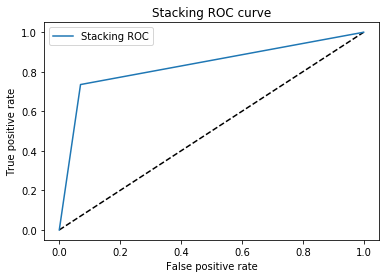

In [46]:
plt.plot([0, 1], [0, 1], 'k--')
fpr_stacking, tpr_stacking, _  = roc_curve(y_test, y_pre_stacking)
plt.plot(fpr_stacking, tpr_stacking, label='Stacking ROC')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Stacking ROC curve')
plt.legend(loc='best')
plt.show()